# Setup SST Plots

Working area to make reproducable and quick plots for monthly SST anomalies.

Want a global projection and each pole showing anomalies. Then row below will be what percentage of *absolute* temperatures they fall in

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import esmtools as et
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cmocean.cm as cm

/Users/ribr5703/miniconda3/envs/py36/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [65]:
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'w',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter

In [2]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 20
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['font.sans-serif'] = ['Avant Garde']
mpl.rcParams['figure.facecolor'] = 'k'
mpl.rcParams['axes.edgecolor'] = 'w'
mpl.rcParams['axes.labelcolor'] = 'w'
mpl.rcParams['text.color'] = 'w'
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.minor.size'] = 0
mpl.rcParams['xtick.color'] = 'w'
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.minor.size'] = 0
mpl.rcParams['savefig.facecolor'] = 'k'
mpl.rcParams['text.usetex'] = False

# Ocean stuff

https://www.esrl.noaa.gov/psd/data/gridded/data.cobe.html#plot


In [40]:
ds = xr.open_mfdataset('/Users/ribr5703/Downloads/sst.mon.mean.nc')

In [41]:
ds = ds['sst']

In [42]:
latest_month = len(ds.time) - (2018 - 1891)*12

In [44]:
ds['time'] = pd.date_range('1891-01', '2018-0' + str(latest_month+1) , freq='M')

In [45]:
# Create anomalies.
clim = ds.sel(time=slice('1891-01', '1920-12')).groupby('time.month').mean('time')
anom = ds.groupby('time.month') - clim

In [46]:
data = anom.sel(time='2018-0' + str(latest_month)).squeeze()
cyclic_data, cyclic_lons = add_cyclic_point(data.values, coord=data.lon.values)

/Users/ribr5703/miniconda3/envs/py36/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/ribr5703/miniconda3/envs/py36/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [47]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November',
               'December']

/Users/ribr5703/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


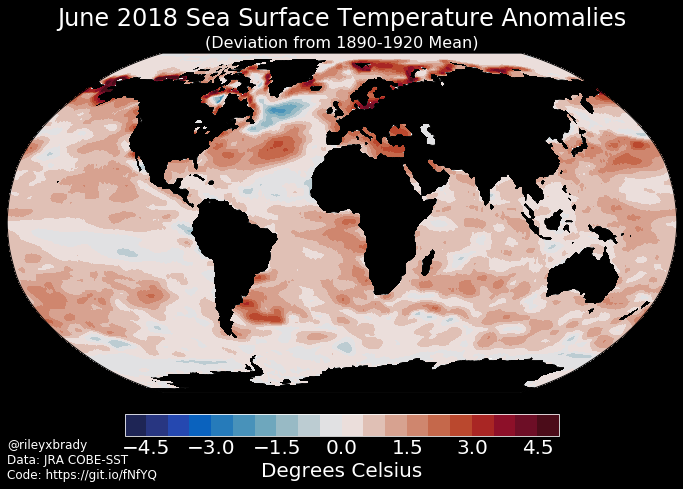

In [49]:
f, ax = et.vis.make_cartopy(grid_lines=False, frameon=True)
p = ax.contourf(cyclic_lons, ds.lat, cyclic_data, np.arange(-5, 5.5, 0.5), 
               transform=ccrs.PlateCarree(), cmap=cm.balance)

plt.colorbar(p, orientation='horizontal',pad=0.05,fraction=0.05,
            label='Degrees Celsius')
# Text Annotation
plt.text(0.5, 1.10, month_names[latest_month - 1] + 
         ' 2018 Sea Surface Temperature Anomalies',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes, fontsize=24)
plt.text(0.5, 1.03, '(Deviation from 1890-1920 Mean)',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes, fontsize=16)


bottom_left = ('@rileyxbrady' + '\n' + 'Data: JRA COBE-SST' + '\n' +
               'Code: https://git.io/fNfYQ')
plt.text(0, -0.2, bottom_left,
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes, fontsize=12)

plt.show()

In [67]:
ts = anom.stack(grid=['lat', 'lon']).mean('grid')

/Users/ribr5703/miniconda3/envs/py36/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/ribr5703/miniconda3/envs/py36/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/Users/ribr5703/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


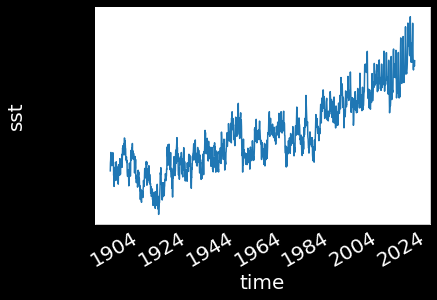

In [69]:
ts.plot()